![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Soil Dynamics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics


# Erdbebensicheres Bauen

Module laden

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Erdbebenersatzkraft nach dem Bemessungsspektrum

abschnittsweise definierte Funktion

In [2]:
def ers(T, p):
    
    if T < 0:
        Sd = 0
        print("Warning, unphysical period")
    elif T < p["TB"]:
        Sd = p["agR"]*p["gl"]*p["S"]*(1+(T/p["TB"])*(2.5/p["q"] - 1))
    elif T < p["TC"]:
        Sd = p["agR"]*p["gl"]*p["S"]*2.5/p["q"]
    elif T < p["TD"]:
        Sd = p["agR"]*p["gl"]*p["S"]*(2.5/p["q"])*p["TC"]/T
    else:
        Sd = p["agR"]*p["gl"]*p["S"]*(2.5/p["q"])*p["TC"]*p["TD"]/(T**2)
    
    if Sd < 0:
        Sd = 0
        print("Warning, negative Sd value encountered")
    
    return Sd

Parameter des Bemessungsspektrums festlegen

In [3]:
para = {"agR": 0.8, "gl": 1.2, "q": 1.5, "S": 1.25, "TB": 0.05, "TC": 0.25, "TD": 2.0}        

Grafische Darstellung

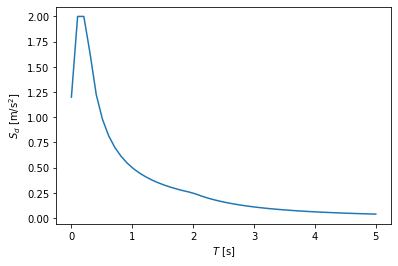

In [4]:
Tgrid = np.linspace(0, 5)
Sgrid = [ers(TT, para) for TT in Tgrid]       
Tgrid
plt.plot(Tgrid, Sgrid)
plt.xlabel("$T$ [s]")
plt.ylabel("$S_d$ [m/s$^2$]")
plt.show()

Eigenperiode des Gebäudes schätzen

In [5]:
h = 6.0
Ct = 0.05
T1 = Ct*h**(3/4) 
print("T1={} s".format(T1))

T1=0.19168293127388175 s


Erdbebenersatzkraft berechnen

In [6]:
Sd1 = ers(T1, para)
m = 80e3
gamma = 1.0
F1 = Sd1*m*gamma
print("F1={} kN, q1max={} kN/m".format(F1/1e3, F1*2e-3/h)) 

F1=160.0 kN, q1max=53.333333333333336 kN/m
